In [17]:
from datasets import load_dataset
import pandas as pd
import re
import unicodedata
import numpy as np

In [18]:
df = pd.DataFrame(load_dataset("hanshan1988/recruitment-dataset-job-descriptions-english-sample-pt5",split="train"))
df.head()

,Position,Long Description,Company Name,Exp Years,Primary Keyword,English Level,Published,Long Description_lang,id,__index_level_0__
0,QA Engineer,LITSLINK is looking for a QA engineer to join ...,LITSLINK,1y,QA,intermediate,2022-10-01T00:00:00+03:00,en,291c1b6a-f8b0-59f5-96d7-5fbad73daa88,124069
1,Middle PHP Developer,Client: Turis is a Software-As-A-Service platf...,Conscensia,2y,PHP,intermediate,2021-11-01T00:00:00+02:00,en,49a5f0cb-c684-52a0-9ef0-810ce87f698c,101613
2,UX/UI Designer (Middle),**Requirements:**\r\nMind Studios is looking f...,Mind Studios,2y,Design,upper,2021-03-01T00:00:00+02:00,en,8e6342ed-2c14-5efd-8ccc-22bf97e3b8c1,167415
3,Back-end developer (Node.js),The customer is a leading Swiss provider of sa...,WeOne,2y,Node.js,upper,2021-05-01T00:00:00+03:00,en,9349da3e-1d9f-576e-b0e8-e8f26ed2f166,35343
4,Middle PHP developer\Magento 2,A large team of young and talented professiona...,Itera-research,1y,PHP,NaN,2020-03-01T00:00:00+02:00,en,99d928bc-2e7a-5ebb-b660-38328962b617,101858


In [19]:
df = df.drop(columns=["Exp Years","English Level","Published","Long Description_lang","id"]) #dropping col as we do not need them

In [20]:
def clean_text(text):
    text  = re.sub(r"\d+", " ", text)
    text = re.sub(r"[@,$,&,/]", " ", text)
    text = re.sub(r"[<.*?>]", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = unicodedata.normalize("NFKD", text)
    text = ''.join([c for c in text if not unicodedata.combining(c)])

    return text

In [21]:
df["Long Description"] = df["Long Description"].apply(clean_text) #cleaning long descrption
df.head()

,Position,Long Description,Company Name,Primary Keyword,__index_level_0__
0,QA Engineer,LITSLINK is looking for a QA engineer to join ...,LITSLINK,QA,124069
1,Middle PHP Developer,Client: Turis is a Software-As-A-Service platf...,Conscensia,PHP,101613
2,UX/UI Designer (Middle),Requirements: Mind Studios is looking for a c...,Mind Studios,Design,167415
3,Back-end developer (Node.js),The customer is a leading Swiss provider of sa...,WeOne,Node.js,35343
4,Middle PHP developer\Magento 2,A large team of young and talented professiona...,Itera-research,PHP,101858


In [22]:
df.rename(columns={"__index_level_0__": "Salary"}, inplace=True) #change index value to salary
df.head()

,Position,Long Description,Company Name,Primary Keyword,Salary
0,QA Engineer,LITSLINK is looking for a QA engineer to join ...,LITSLINK,QA,124069
1,Middle PHP Developer,Client: Turis is a Software-As-A-Service platf...,Conscensia,PHP,101613
2,UX/UI Designer (Middle),Requirements: Mind Studios is looking for a c...,Mind Studios,Design,167415
3,Back-end developer (Node.js),The customer is a leading Swiss provider of sa...,WeOne,Node.js,35343
4,Middle PHP developer\Magento 2,A large team of young and talented professiona...,Itera-research,PHP,101858


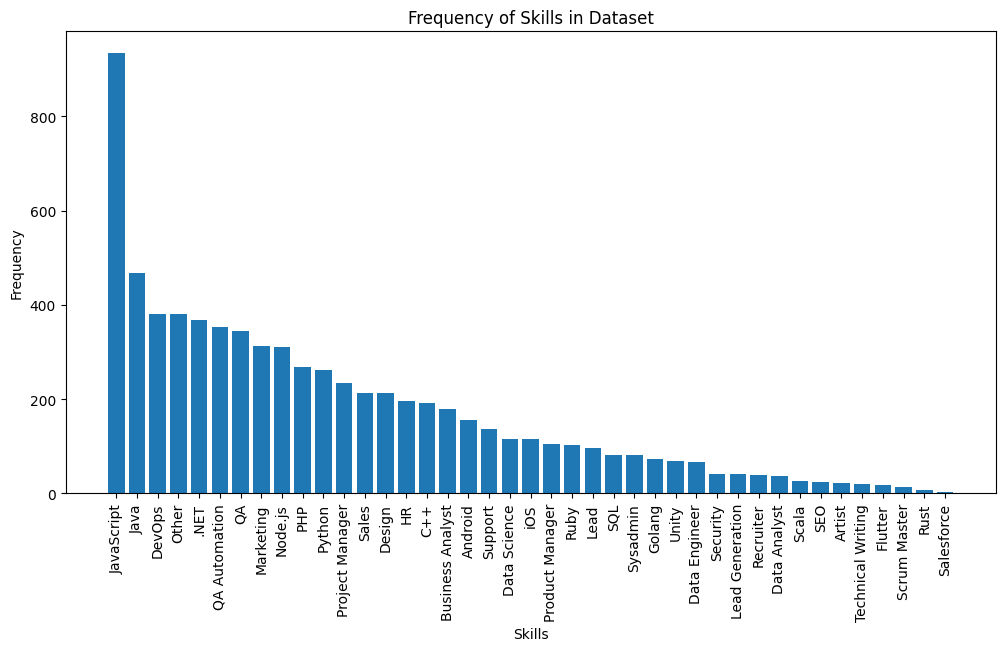

In [23]:
import matplotlib.pyplot as plt

# Count frequency of each skill
skill_counts = df["Primary Keyword"].value_counts()
skills = skill_counts.index
counts = skill_counts.values

plt.figure(figsize=(12,6))

# bars must be assigned to capture them
bars = plt.bar(skills, counts)

plt.xticks(rotation=90) #rotate so the dont over
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.title("Frequency of Skills in Dataset")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df["Primary Keyword"],df["Position"],test_size=0.2,random_state=30)
#using primary key to locate position

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer() #vectorize
X_train_tfid = tfid.fit_transform(X_train) #learn and appy both on training
X_test_tfid = tfid.transform(X_test) #apply what you trained on test data

In [26]:
from sklearn.neural_network import MLPClassifier
#as we have several different uniqure outputs, MLP would be better 

In [27]:
tfd_MLP = MLPClassifier() #model 
tfd_MLP.fit(X_train_tfid,Y_train) #learn
predicton = tfd_MLP.predict(X_test_tfid[0]) #predict
print(predicton[0])

Node.js Developer


/opt/anaconda3/envs/unity/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from datasets import load_dataset
import pandas as pd
import re
import unicodedata
import numpy as np

In [ ]:
df = pd.DataFrame(load_dataset("hanshan1988/recruitment-dataset-job-descriptions-english-sample-pt5",split="train"))
df.head()

,Position,Long Description,Company Name,Exp Years,Primary Keyword,English Level,Published,Long Description_lang,id,__index_level_0__
0,QA Engineer,LITSLINK is looking for a QA engineer to join ...,LITSLINK,1y,QA,intermediate,2022-10-01T00:00:00+03:00,en,291c1b6a-f8b0-59f5-96d7-5fbad73daa88,124069
1,Middle PHP Developer,Client: Turis is a Software-As-A-Service platf...,Conscensia,2y,PHP,intermediate,2021-11-01T00:00:00+02:00,en,49a5f0cb-c684-52a0-9ef0-810ce87f698c,101613
2,UX/UI Designer (Middle),**Requirements:**\r\nMind Studios is looking f...,Mind Studios,2y,Design,upper,2021-03-01T00:00:00+02:00,en,8e6342ed-2c14-5efd-8ccc-22bf97e3b8c1,167415
3,Back-end developer (Node.js),The customer is a leading Swiss provider of sa...,WeOne,2y,Node.js,upper,2021-05-01T00:00:00+03:00,en,9349da3e-1d9f-576e-b0e8-e8f26ed2f166,35343
4,Middle PHP developer\Magento 2,A large team of young and talented professiona...,Itera-research,1y,PHP,NaN,2020-03-01T00:00:00+02:00,en,99d928bc-2e7a-5ebb-b660-38328962b617,101858


In [ ]:
df = df.drop(columns=["Exp Years","English Level","Published","Long Description_lang","id"]) #dropping col as we do not need them

In [ ]:
def clean_text(text):
    text  = re.sub(r"\d+", " ", text)
    text = re.sub(r"[@,$,&,/]", " ", text)
    text = re.sub(r"[<.*?>]", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = unicodedata.normalize("NFKD", text)
    text = ''.join([c for c in text if not unicodedata.combining(c)])

    return text

In [ ]:
df["Long Description"] = df["Long Description"].apply(clean_text) #cleaning long descrption
df.head()

,Position,Long Description,Company Name,Primary Keyword,__index_level_0__
0,QA Engineer,LITSLINK is looking for a QA engineer to join ...,LITSLINK,QA,124069
1,Middle PHP Developer,Client: Turis is a Software-As-A-Service platf...,Conscensia,PHP,101613
2,UX/UI Designer (Middle),Requirements: Mind Studios is looking for a c...,Mind Studios,Design,167415
3,Back-end developer (Node.js),The customer is a leading Swiss provider of sa...,WeOne,Node.js,35343
4,Middle PHP developer\Magento 2,A large team of young and talented professiona...,Itera-research,PHP,101858


In [ ]:
df.rename(columns={"__index_level_0__": "Salary"}, inplace=True) #change index value to salary
df.head()

,Position,Long Description,Company Name,Primary Keyword,Salary
0,QA Engineer,LITSLINK is looking for a QA engineer to join ...,LITSLINK,QA,124069
1,Middle PHP Developer,Client: Turis is a Software-As-A-Service platf...,Conscensia,PHP,101613
2,UX/UI Designer (Middle),Requirements: Mind Studios is looking for a c...,Mind Studios,Design,167415
3,Back-end developer (Node.js),The customer is a leading Swiss provider of sa...,WeOne,Node.js,35343
4,Middle PHP developer\Magento 2,A large team of young and talented professiona...,Itera-research,PHP,101858


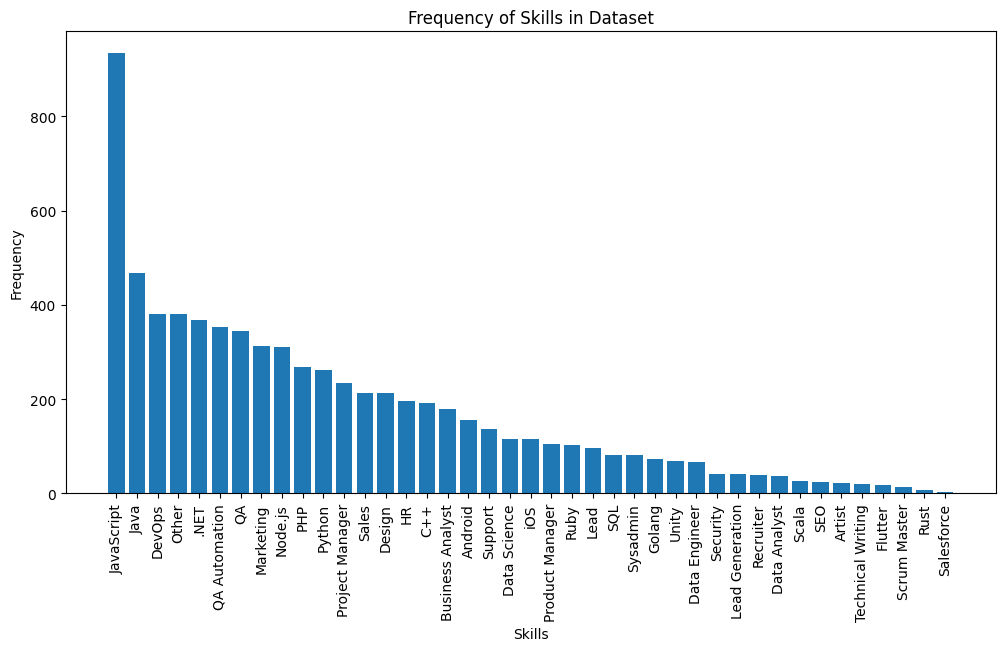

In [ ]:
import matplotlib.pyplot as plt

# Count frequency of each skill
skill_counts = df["Primary Keyword"].value_counts()
skills = skill_counts.index
counts = skill_counts.values

plt.figure(figsize=(12,6))

# bars must be assigned to capture them
bars = plt.bar(skills, counts)

plt.xticks(rotation=90) #rotate so the dont over
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.title("Frequency of Skills in Dataset")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df["Primary Keyword"],df["Position"],test_size=0.2,random_state=30)
#using primary key to locate position

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer() #vectorize
X_train_tfid = tfid.fit_transform(X_train) #learn and appy both on training
X_test_tfid = tfid.transform(X_test) #apply what you trained on test data

In [ ]:
from sklearn.neural_network import MLPClassifier
#as we have several different uniqure outputs, MLP would be better 

In [ ]:
tfd_MLP = MLPClassifier() #model 
tfd_MLP.fit(X_train_tfid,Y_train) #learn
predicton = tfd_MLP.predict(X_test_tfid[0]) #predict
print(predicton[0])

Node.js Developer


/opt/anaconda3/envs/unity/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import json
def predict_data(user_skills: list):
    company = {
        "Positions": [],
        "Company": [],
        "Descriptions": [],
        "Salaries": []
    }
    for skill in user_skills:
        vec  = tfid.transform([skill]) # trasform expects list, we give it each skills as list 
        pred = tfd_MLP.predict(vec)[0] #output is np array we use [0] to give it as string

        similarity = cosine_similarity(vec,X_train_tfid) #cosine checks similarity for other info we need,output 0(not)/1(similar)
        index = np.argmax(similarity) #finds the training sample index with the highest similarity
        #append all info in company, using index find the other info on training set  and append
        company["Positions"].append(pred)
        company["Companies"].append(df.iloc[X_train.index[index]]["Company Name"])
        company["Descriptions"].append(df.iloc[X_train.index[index]]["Long Description"])
        company["Salaries"].append(df.iloc[X_train.index[index]]["Salary"])
    
    return json.dumps(company,indent=2) #return as json

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
import json
def predict_data(user_skills: list):
    company = {
        "Positions": [],
        "Company": [],
        "Descriptions": [],
        "Salaries": []
    }
    for skill in user_skills:
        vec  = tfid.transform([skill]) # trasform expects list, we give it each skills as list 
        pred = tfd_MLP.predict(vec)[0] #output is np array we use [0] to give it as string

        similarity = cosine_similarity(vec,X_train_tfid) #cosine checks similarity for other info we need,output 0(not)/1(similar)
        index = np.argmax(similarity) #finds the training sample index with the highest similarity
        #append all info in company, using index find the other info on training set  and append
        company["Positions"].append(pred)
        company["Companies"].append(df.iloc[X_train.index[index]]["Company Name"])
        company["Descriptions"].append(df.iloc[X_train.index[index]]["Long Description"])
        company["Salaries"].append(df.iloc[X_train.index[index]]["Salary"])
    
    return json.dumps(company,indent=2) #return as json